# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

There are 10 files with the names states0.csv to states9.csv
The columns are:
    State string
    TotalPop int
    Hispanic float + %
    White
    Black
    Native
    Asian
    Pacific
    Income $ + float + ,
    GenderPop int + M + _ + int + F

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

state_data = glob.glob("states*.csv")

states_list = []

for state in state_data:
    data = pd.read_csv(state)
    states_list.append(data)

us_census = pd.concat(states_list)

print(us_census.head(50))

   Unnamed: 0                 State  TotalPop Hispanic   White   Black  \
0           0               Alabama   4830620    3.75%  61.88%  31.25%   
1           1                Alaska    733375    5.91%  60.91%   2.85%   
2           2               Arizona   6641928   29.57%  57.12%   3.85%   
3           3              Arkansas   2958208    6.22%  71.14%  18.97%   
4           4            California  38421464   37.29%  40.22%   5.68%   
5           5              Colorado   5278906   20.78%  69.90%   3.55%   
0           0              Colorado   5278906   20.78%  69.90%   3.55%   
1           1           Connecticut   3593222   15.60%  67.68%  10.35%   
2           2              Delaware    926454    8.82%  64.63%  20.74%   
3           3  District of Columbia    647484    9.17%  33.10%  51.78%   
4           4               Florida  19645772   21.34%  59.08%  15.17%   
5           5               Georgia  10006693    8.42%  54.29%  32.09%   
0           0               Georgia  1

3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [148]:
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

remove % for every column Hispanic - Pacific and turn to float; remove $ and , from income and turn to float; seperate genderPop into malePop and femalePop columns

## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [149]:
us_census.Income = us_census.Income.str.replace("[\$,]", "", regex = True)
us_census.Income = pd.to_numeric(us_census.Income)
print(us_census.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
dtype: object


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [150]:
str_split = us_census.GenderPop.str.split("_")
print(str_split.head())

0      [2341093M, 2489527F]
1        [384160M, 349215F]
2      [3299088M, 3342840F]
3      [1451913M, 1506295F]
4    [19087135M, 19334329F]
Name: GenderPop, dtype: object


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [151]:
# str_split[0] = str_split[0].str.replace("M", "")
# str_split[1] = str_split[1].str.replace("F", "")
print(str_split.head())
us_census["MalePop"] = pd.to_numeric(str_split.str.get(0).str.replace("M", ""))
us_census["FemalePop"] = us_census.TotalPop - us_census.MalePop
print(us_census.head())

0      [2341093M, 2489527F]
1        [384160M, 349215F]
2      [3299088M, 3342840F]
3      [1451913M, 1506295F]
4    [19087135M, 19334329F]
Name: GenderPop, dtype: object
   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific    Income            GenderPop   MalePop  FemalePop  
0   0.03%  43296.36    2341093M_2489527F   2341093    2489527  
1   1.06%  70354.74      384160M_349215F    384160     349215  
2   0.17%  54207.82    3299088M_3342840F   3299088    3342840  
3   0.15%  41935.63    1451913M_1506295F   1451913    1506295  
4   0.35%  67264.78  1908713

8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

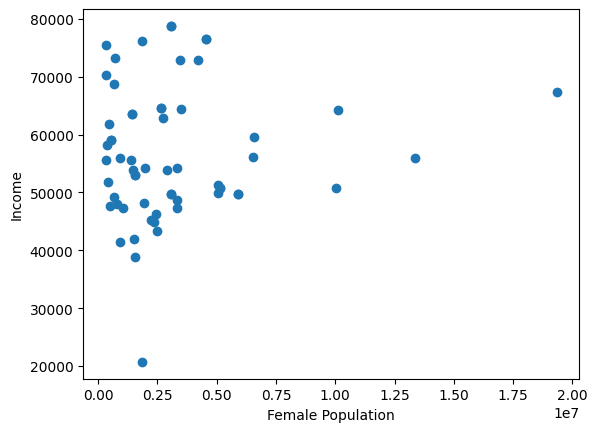

<Figure size 640x480 with 0 Axes>

In [152]:
plt.scatter(us_census.FemalePop, us_census.Income)
plt.xlabel("Female Population")
plt.ylabel("Income")
plt.show()
plt.clf()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [153]:
# Already filled the Female column by using TotalPop and MalePop

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [154]:
print(us_census.duplicated(subset="State").value_counts())

False    51
True      9
dtype: int64


11. Drop those duplicates using the `.drop_duplicates()` function.

In [155]:
us_census = us_census.drop_duplicates(subset = "State")

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

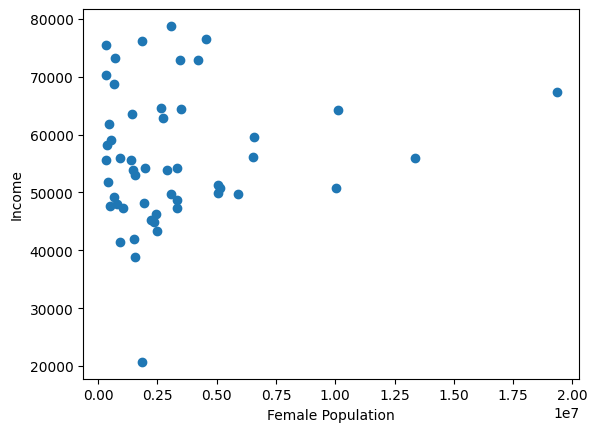

<Figure size 640x480 with 0 Axes>

In [156]:
plt.scatter(us_census.FemalePop, us_census.Income)
plt.xlabel("Female Population")
plt.ylabel("Income")
plt.show()
plt.clf()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [157]:
print(us_census.columns)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'MalePop',
       'FemalePop'],
      dtype='object')


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [158]:
print(us_census.duplicated(subset=["Hispanic", "White", "Black", "Native", "Asian"]).value_counts())
print(us_census.head(3))
us_census.Hispanic = pd.to_numeric(us_census.Hispanic.str.replace("%", ""))
us_census.White = pd.to_numeric(us_census.White.str.replace("%", ""))
us_census.Black = pd.to_numeric(us_census.Black.str.replace("%", ""))
us_census.Native = pd.to_numeric(us_census.Native.str.replace("%", ""))
us_census.Asian = pd.to_numeric(us_census.Asian.str.replace("%", ""))
us_census.Pacific = pd.to_numeric(us_census.Pacific.str.replace("%", ""))
us_census.Pacific = us_census.Pacific.fillna((100 - us_census.White - us_census.Hispanic - us_census.Black - us_census.Native - us_census.Asian))
print(us_census.head(3))

False    51
dtype: int64
   Unnamed: 0    State  TotalPop Hispanic   White   Black  Native  Asian  \
0           0  Alabama   4830620    3.75%  61.88%  31.25%   0.45%  1.05%   
1           1   Alaska    733375    5.91%  60.91%   2.85%  16.39%  5.45%   
2           2  Arizona   6641928   29.57%  57.12%   3.85%   4.36%  2.88%   

  Pacific    Income          GenderPop  MalePop  FemalePop  
0   0.03%  43296.36  2341093M_2489527F  2341093    2489527  
1   1.06%  70354.74    384160M_349215F   384160     349215  
2   0.17%  54207.82  3299088M_3342840F  3299088    3342840  
   Unnamed: 0    State  TotalPop  Hispanic  White  Black  Native  Asian  \
0           0  Alabama   4830620      3.75  61.88  31.25    0.45   1.05   
1           1   Alaska    733375      5.91  60.91   2.85   16.39   5.45   
2           2  Arizona   6641928     29.57  57.12   3.85    4.36   2.88   

   Pacific    Income          GenderPop  MalePop  FemalePop  
0     0.03  43296.36  2341093M_2489527F  2341093    2489527  
1

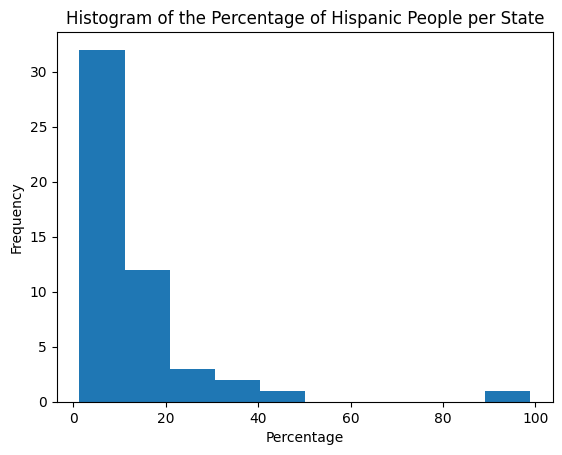

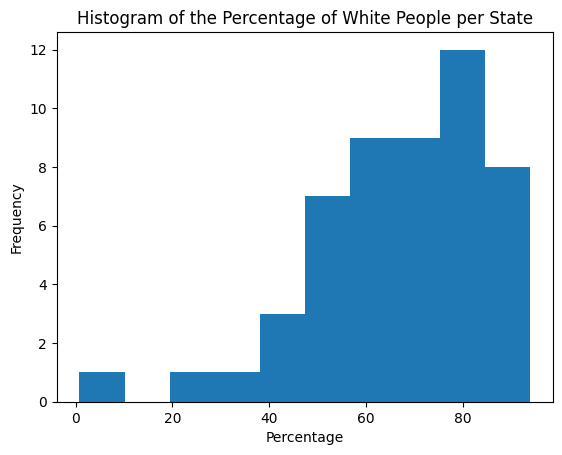

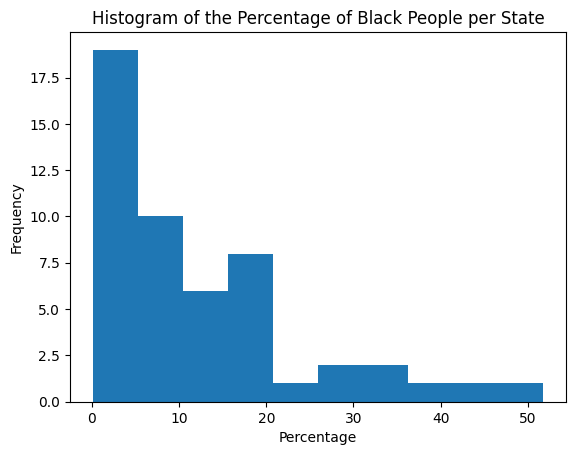

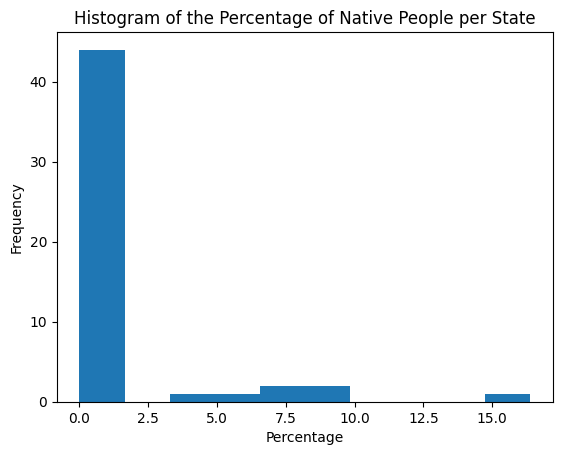

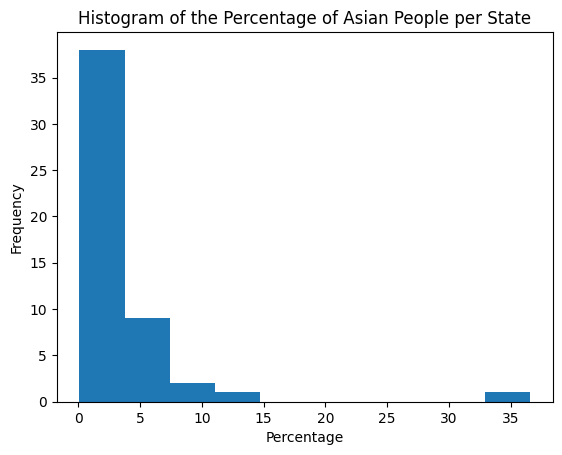

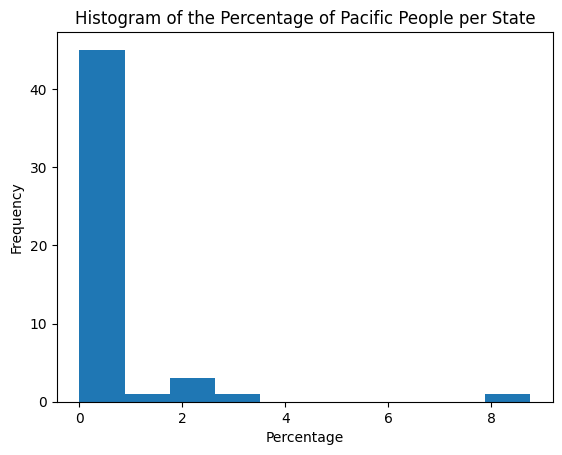

<Figure size 640x480 with 0 Axes>

In [159]:
for race in ["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]:
    plt.hist(us_census[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()

## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.

   Unnamed: 0       State  TotalPop  Hispanic  White  Black  Native  Asian  \
0           0     Alabama   4830620      3.75  61.88  31.25    0.45   1.05   
1           1      Alaska    733375      5.91  60.91   2.85   16.39   5.45   
2           2     Arizona   6641928     29.57  57.12   3.85    4.36   2.88   
3           3    Arkansas   2958208      6.22  71.14  18.97    0.52   1.14   
4           4  California  38421464     37.29  40.22   5.68    0.41  13.05   

   Pacific    Income            GenderPop   MalePop  FemalePop  
0     0.03  43296.36    2341093M_2489527F   2341093    2489527  
1     1.06  70354.74      384160M_349215F    384160     349215  
2     0.17  54207.82    3299088M_3342840F   3299088    3342840  
3     0.15  41935.63    1451913M_1506295F   1451913    1506295  
4     0.35  67264.78  19087135M_19334329F  19087135   19334329  


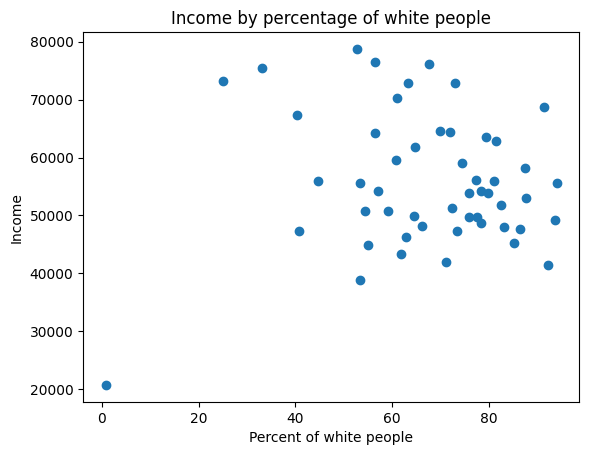

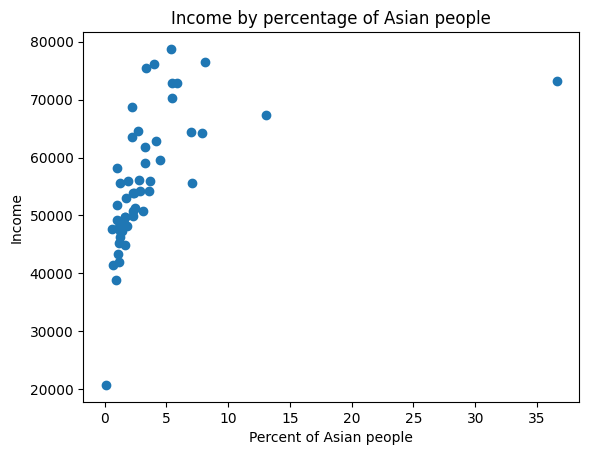

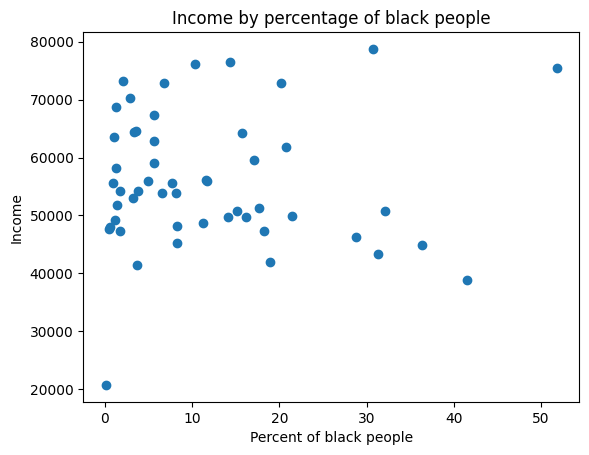

C:\Users\lasse\AppData\Local\Temp\ipykernel_18740\246938071.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(us_census.corr(), center = 0, cmap = colors, robust = True)


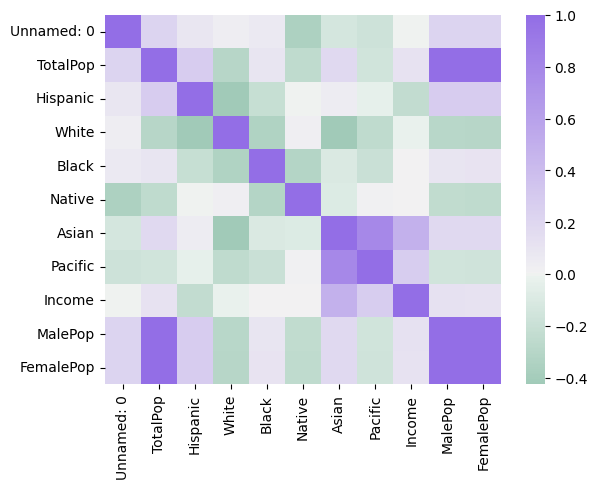

<Figure size 640x480 with 0 Axes>

In [161]:
print(us_census.head())
plt.scatter(us_census.White, us_census.Income)
plt.title("Income by percentage of white people")
plt.xlabel("Percent of white people")
plt.ylabel("Income")
plt.show()
plt.clf()
plt.scatter(us_census.Asian, us_census.Income)
plt.title("Income by percentage of Asian people")
plt.xlabel("Percent of Asian people")
plt.ylabel("Income")
plt.show()
plt.clf()
plt.scatter(us_census.Black, us_census.Income)
plt.title("Income by percentage of black people")
plt.xlabel("Percent of black people")
plt.ylabel("Income")
plt.show()
plt.clf()

colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(us_census.corr(), center = 0, cmap = colors, robust = True)
plt.show()
plt.clf()